# **Maestría en Inteligencia Artificial Aplicada**

## **Operaciones de aprendizaje automatico**

### Tecnológico de Monterrey

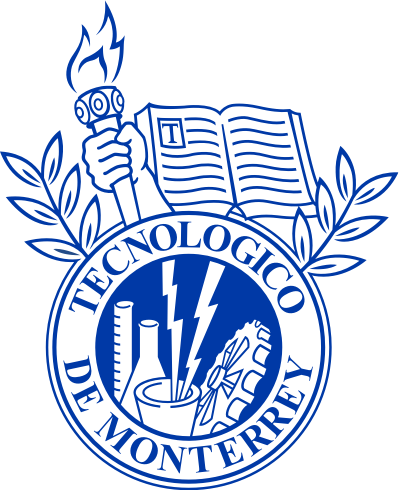

### Equipo 17

 Iván Nava Cardeño 

 Flavio César Palacios Salas

 Luis Enrique Gonzáles Gonzáles

 Fanny Betsabé Fuentes Reyes

 Emanuel Flores Martinez 



## Simulación de Data Drift con Detección de Pérdida de Performance

Para modelar el datadrif necesario para simular la detección de pérdida de performance, se utilizará la librería `alibi-detect`, la cual cuenta con varios métodos para modelar diferentes tipos de datadrift. En este caso, se utilizará el método `KSDrift` para detectar cambios en la distribución de los datos.

In [2]:
## Import libraries and modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os



import sys
sys.path.append("../")


from src.data_drift import DataDriftGenerator



In [7]:
def plot_kde_hist(df, hue = None, n_cols=4):
    """"
    Dibuja gráficos KDE para variables numéricas en un DataFrame, con opción de agrupar por una variable categórica.
    """
    # Solo columnas numéricas
    df_numeric = df.select_dtypes(include='number')
    num_plots = len(df_numeric.columns)

    # Calcular filas necesarias
    n_rows = math.ceil(num_plots / n_cols)

    # Crear subplots (ajusta el número de filas/columnas según lo que necesites)
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 8))
    axes = axes.flatten() 

    fig.suptitle('Comparación de la Distribución KDE de las variables númericas', fontsize=20)
    # Generar gráfico KDE por cada columna
    for ax, col in zip(axes, df_numeric.columns):
        sns.kdeplot(data=df, x = col,hue=hue, ax=ax, fill=True )
        ax.set_title(f'{col}')
        ax.set_xlabel("Valor")
        ax.set_ylabel("Densidad")
        ax.grid(True)

     # Ocultar subplots vacíos si los hay
    for j in range(num_plots, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


def boxplots(df, n_cols=4, figsize_per_plot=(4, 4), y = None, hue = None):
    # Seleccionar columnas numéricas
    df_numeric = df.select_dtypes(include='number')
    num_plots = len(df_numeric.columns)

    # Calcular filas necesarias
    n_rows = math.ceil(num_plots / n_cols)

    # Crear figura y subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * figsize_per_plot[0], n_rows * figsize_per_plot[1]))
    axes = axes.flatten()  # Para indexar fácilmente, aunque sea 1D

    for i, col in enumerate(df_numeric.columns):
        ax = axes[i]
        sns.boxplot(data=df, x = col, ax=ax, orient= 'h', y = y, hue = hue)
        ax.set_title(f'{col}')
        ax.grid(True)

    # Ocultar subplots vacíos si los hay
    for j in range(num_plots, len(axes)):
        axes[j].set_visible(False)

    fig.suptitle('Box-Plot de las variables númericas', fontsize=20)

    plt.tight_layout()
    plt.show()

In [4]:
# Load the dataset

data_path = os.path.abspath("../data/processed/steel_energy_modified_clean.csv")
df = pd.read_csv(data_path, parse_dates=["date"])


# Initialize drift generator
drift_gen = DataDriftGenerator(original_data= df, random_state=42)

# Generate different types of drift
print("Generating different drift scenarios...")

# 1. Gradual drift
gradual_drift = drift_gen.generate_gradual_drift(n_samples=5000, drift_intensity=0.3)
print(f"Gradual drift generated: {gradual_drift.shape}")

# 2. Sudden drift
sudden_drift = drift_gen.generate_sudden_drift(n_samples=5000, changepoint=0.5, drift_intensity=0.5)
print(f"Sudden drift generated: {sudden_drift.shape}")

# 3. Seasonal drift
seasonal_drift = drift_gen.generate_seasonal_drift(n_samples=5000, amplitude=0.3)
print(f"Seasonal drift generated: {seasonal_drift.shape}")

# 4. Multivariate drift
multivariate_drift = drift_gen.generate_multivariate_drift(n_samples=5000, drift_intensity=0.4)
print(f"Multivariate drift generated: {multivariate_drift.shape}")

# 5. Categorical drift
categorical_drift = drift_gen.generate_categorical_drift(n_samples=5000)
print(f"Categorical drift generated: {categorical_drift.shape}")


Generating different drift scenarios...
Gradual drift generated: (5000, 12)
Sudden drift generated: (5000, 12)
Seasonal drift generated: (5000, 12)
Multivariate drift generated: (5000, 10)
Categorical drift generated: (5000, 12)


In [5]:
df['Dataset'] = "Original"
gradual_drift['Dataset'] = "Gradual Drift"
sudden_drift['Dataset'] = "Sudden Drift"
seasonal_drift['Dataset'] = "Seasonal Drift"  
multivariate_drift['Dataset'] = "Multivariate Drift"
categorical_drift['Dataset'] = "Categorical Drift"


combined_df = pd.concat([df, gradual_drift, sudden_drift, seasonal_drift, multivariate_drift, categorical_drift], ignore_index=True)

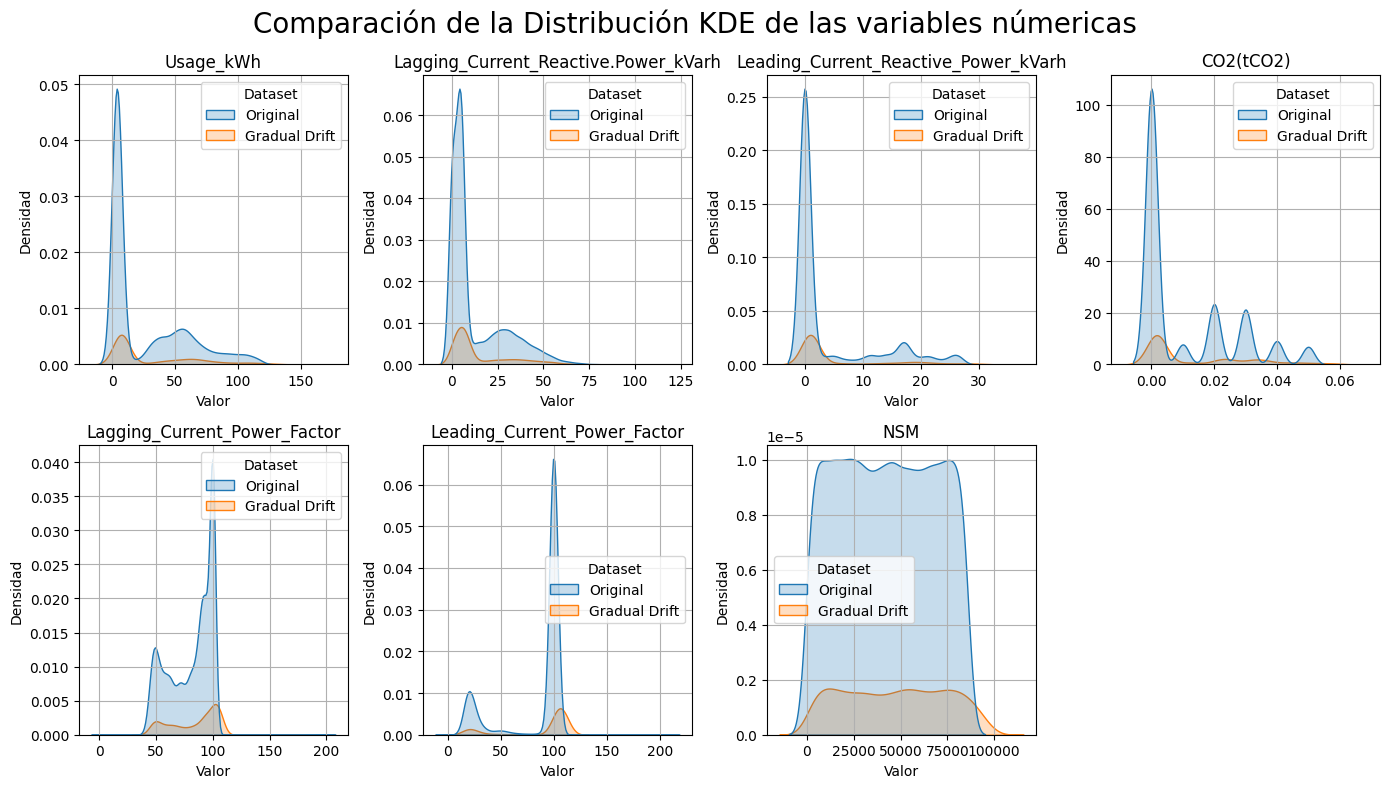

In [8]:
# Comparación de distribuciones entre los dos datasets sin outliers
plot_kde_hist(combined_df[(combined_df['Dataset'] == 'Original') | (combined_df['Dataset'] == 'Gradual Drift')], hue = 'Dataset', n_cols=4)

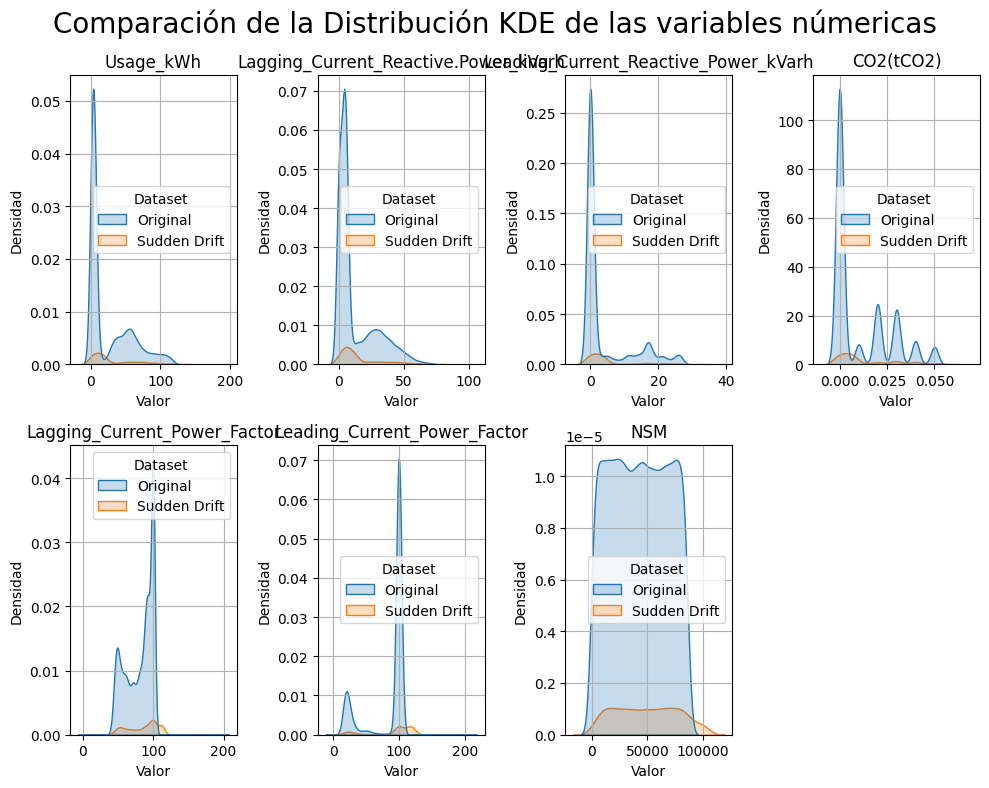

In [11]:
# Comparación de distribuciones entre los dos datasets sin outliers
plot_kde_hist(combined_df[(combined_df['Dataset'] == 'Original') | (combined_df['Dataset'] == 'Sudden Drift')], hue = 'Dataset', n_cols=4)